In [1]:
import pandas            as pd
import networkx          as nx
import matplotlib.pyplot as plt
import seaborn           as sns

from utils  import construct_prop_df, construct_graph
from config import PATH, THRESHOLDS, RT_UNDER_COLUMNS, EXCLUDE_COLUMNS

In [2]:
df = pd.read_csv(PATH + 'dataset_enhanced.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2139 non-null   int64  
 1   tweet               2139 non-null   object 
 2   label               2139 non-null   object 
 3   poster              2139 non-null   int64  
 4   num_rt              2139 non-null   int64  
 5   depth_max           2139 non-null   int64  
 6   depth_avg           2139 non-null   float64
 7   time_total          2139 non-null   float64
 8   time_avg            2139 non-null   float64
 9   rts_half_life       2139 non-null   float64
 10  num_circles         2139 non-null   int64  
 11  rts_under_5_min     2139 non-null   int64  
 12  rts_under_30_min    2139 non-null   int64  
 13  rts_under_60_min    2139 non-null   int64  
 14  rts_under_180_min   2139 non-null   int64  
 15  rts_under_480_min   2139 non-null   int64  
 16  rts_un

In [4]:
def stats_analysis(df):
    stats           = []
    df_filtered = df.drop(columns=EXCLUDE_COLUMNS)
        
    means   = df_filtered.mean().round(2)
    stds    = df_filtered.std().round(2)
    medians = df_filtered.median().round(2)
    
    summary_df = pd.DataFrame({
    'Mean':   means,
    'STD':    stds,
    'Median': medians
})

    return summary_df

def stats_analysis_per_label(dfs, titles):
    stats = {}
    for dfi, t in zip(dfs, titles):
        stats[t] = stats_analysis(dfi)

    return pd.concat(stats, axis=1)

stats_analysis(df)

,Mean,STD,Median
num_rt,421.98,440.49,275.00
depth_max,3.71,1.59,3.00
depth_avg,1.30,0.33,1.18
time_total,69928.60,165001.36,11707.03
time_avg,2932.38,52340.58,326.93
rts_half_life,0.98,0.07,0.99
num_circles,4.73,9.47,2.00
rts_under_5_min,59.19,84.77,38.00
rts_under_30_min,158.83,183.89,109.00
rts_under_60_min,203.94,224.31,141.00


In [5]:
# remove all_caps count, all 0
df = df.drop(columns = ['num_all_caps'])

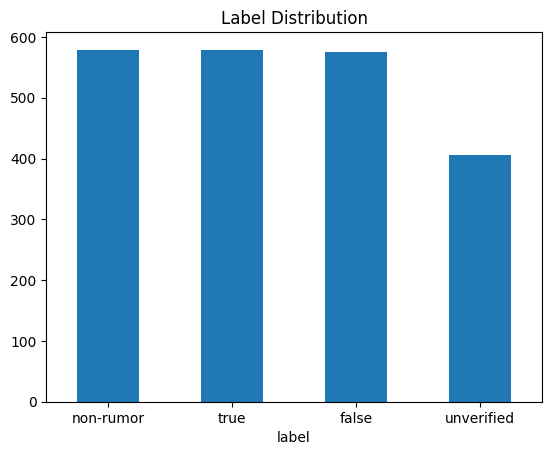

In [6]:
ax = df['label'].value_counts().plot(kind='bar', title="Label Distribution")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [7]:
# mapping and separation
label_mapping = {label: idx for idx, label in enumerate(sorted(set(df['label'])))}
print('Label Mapping')
print(label_mapping)
df['label'] = df['label'].map(label_mapping)

dfs    = []
titles = []
for t, l in label_mapping.items():
    dfs.append(df[df['label'] == l])
    titles.append(t)

Label Mapping
{'false': 0, 'non-rumor': 1, 'true': 2, 'unverified': 3}


In [8]:
stats_analysis_per_label(dfs, titles)

false                      non-rumor            \
                         Mean        STD    Median      Mean       STD   
num_rt                 364.91     443.82    214.00    629.29    446.24   
depth_max                3.68       1.65      3.00      3.80      1.54   
depth_avg                1.30       0.34      1.19      1.26      0.30   
time_total          101503.77  233866.83  12206.55  61372.21  84465.59   
time_avg              7890.68  100514.38    446.87    812.02   2016.22   
rts_half_life            0.97       0.09      0.99      0.99      0.04   
num_circles              6.09      11.68      2.00      4.45      7.77   
rts_under_5_min         36.33      54.72     23.00     93.00     90.25   
rts_under_30_min       109.98     142.06     77.00    246.98    206.14   
rts_under_60_min       146.42     180.52    101.00    314.39    250.56   
rts_under_180_min      210.88     247.97    139.00    422.84    315.48   
rts_under_480_min      264.89     317.91    169.00    507.95    366.78   
rts_under_720_min      282.66     337.18    179.00    538.84    385.60   
rts_under_1440_min     309.87     367.45    190.00    582.43    410.93   
length                  88.25      24.60     91.00     89.68     23.40   
num_words               14.73       4.33     15.00     15.19      4.15   
num_urls                 1.31       0.72      1.00      1.45      0.58   
num_mentions             0.20       0.57      0.00      0.27      0.62   
num_hashtags             0.41       0.78      0.00      0.26      0.51   
num_emoji                0.08       0.53      0.00      0.04      0.22   
num_punc                 2.45       2.05      2.00      2.49      2.07   
day_1_perc               0.89       0.19      0.96      0.93      0.10   

                                  true                     unverified  \
                      Median      Mean        STD   Median       Mean   
num_rt                478.00    360.03     415.59   205.00     295.53   
depth_max               3.00      3.67       1.58     3.00       3.67   
depth_avg               1.14      1.31       0.32     1.19       1.33   
time_total          21575.38  65533.96  172514.95  5718.30   43679.65   
time_avg              381.90   1139.64    5398.19   164.71    1490.66   
rts_half_life           1.00      0.98       0.08     0.99       0.97   
num_circles             2.00      3.54       8.18     1.00       4.93   
rts_under_5_min        72.00     67.15     108.48    46.00      31.99   
rts_under_30_min      197.00    166.85     206.30   112.00      90.85   
rts_under_60_min      251.00    208.44     244.28   138.00     121.47   
rts_under_180_min     334.00    269.60     302.84   167.00     175.20   
rts_under_480_min     397.00    307.55     343.06   183.00     213.49   
rts_under_720_min     420.00    319.90     359.32   191.00     229.00   
rts_under_1440_min    448.00    336.32     379.59   198.00     253.00   
length                 93.00     93.71      22.53    95.00      97.54   
num_words              15.00     15.74       4.09    16.00      16.05   
num_urls                1.00      1.22       0.70     1.00       1.19   
num_mentions            0.00      0.10       0.36     0.00       0.20   
num_hashtags            0.00      0.48       0.85     0.00       0.57   
num_emoji               0.00      0.09       1.87     0.00       0.07   
num_punc                2.00      2.61       1.90     2.00       2.70   
day_1_perc              0.96      0.95       0.12     0.99       0.90   

                                        
                          STD   Median  
num_rt                 356.17   170.50  
depth_max                1.61     3.00  
depth_avg                0.34     1.23  
time_total          106358.94  7992.32  
time_avg              6901.32   351.51  
rts_half_life            0.06     0.99  
num_circles              9.69     2.00  
rts_under_5_min         45.50    22.00  
rts_under_30_min        96.54    68.00  
rts_under_60_min       125.20    87.50  
rt

In [9]:
def plot_avg_retweet_speed(dfs, titles):
    plt.figure(figsize=(12, 8))
    
    for df, t in zip(dfs, titles):
        average_retweets = df[RT_UNDER_COLUMNS].mean()
        plt.plot(THRESHOLDS[1:], average_retweets, label=t)
    
    plt.xlabel('Time (minutes)')
    plt.ylabel('AVG # Retweets')
    plt.title('Comparison of AVG Retweets Over Time - Day 1')
    plt.legend()
    plt.show()

    return None

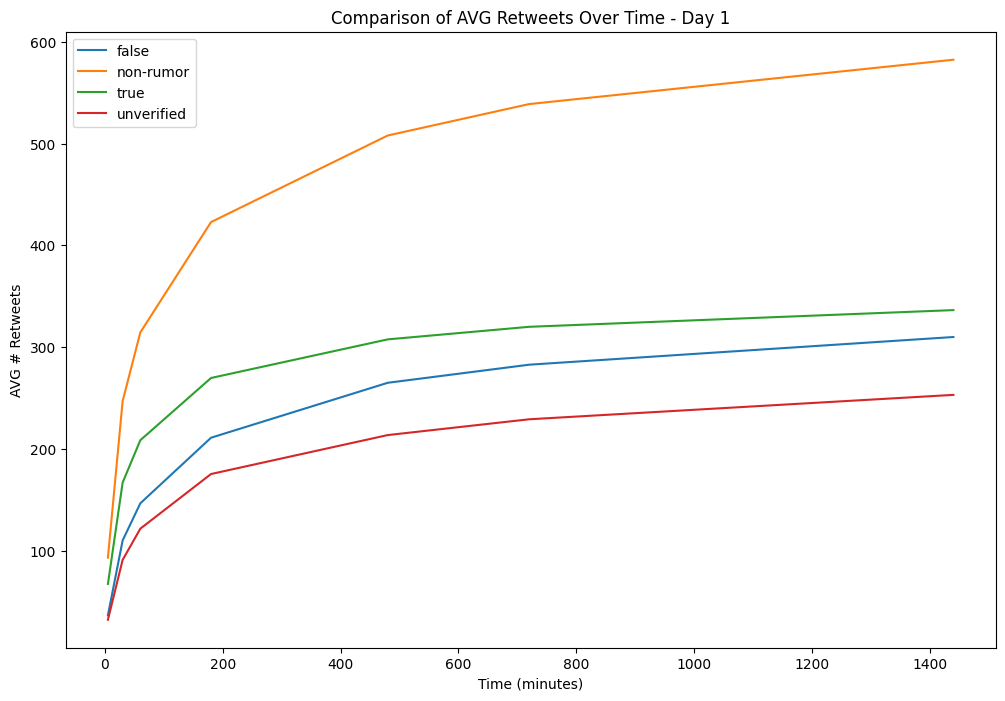

In [10]:
plot_avg_retweet_speed(dfs, titles)

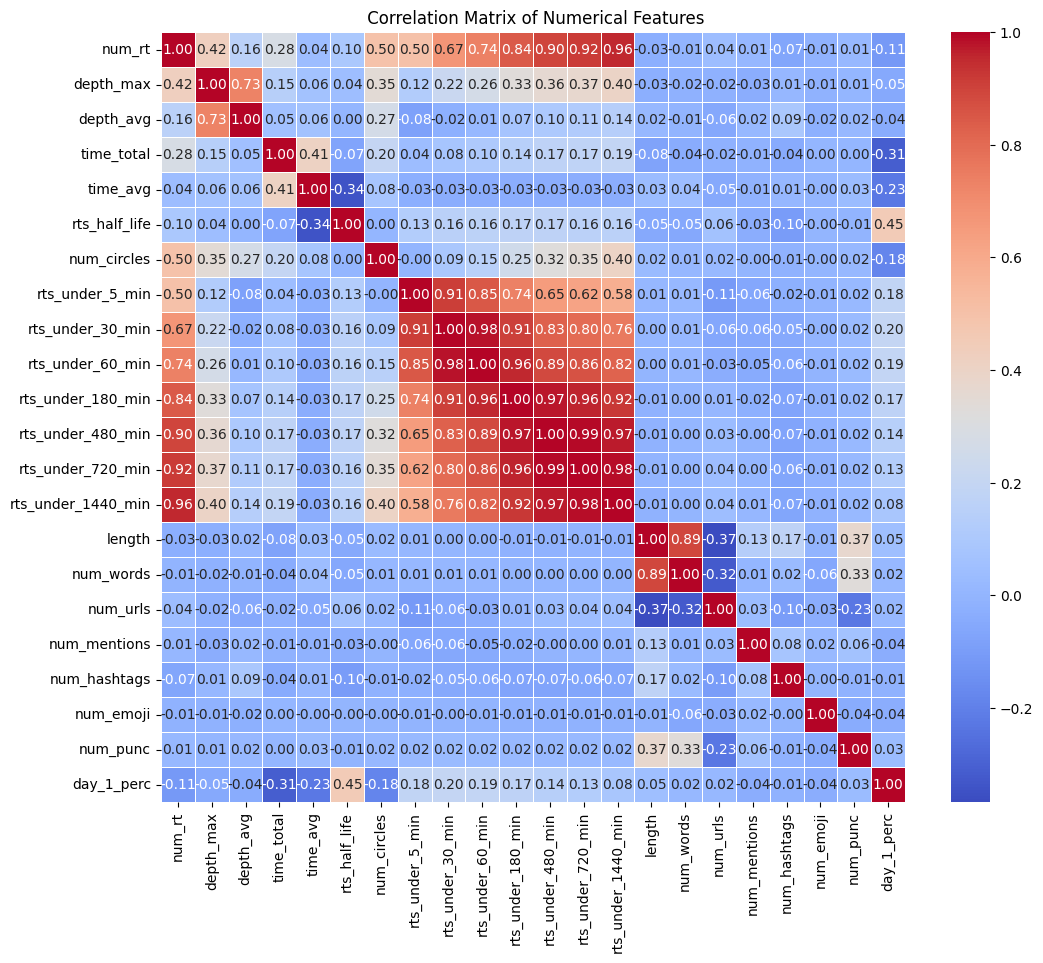

In [11]:
def correlation(df, title = ''):
    df_filtered = df.drop(columns=EXCLUDE_COLUMNS)
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_filtered.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"{title} Correlation Matrix of Numerical Features")
    plt.show()

def correlation_per_label(dfs, titles):
    for dfi, t in zip(dfs, titles):
        correlation(dfi, t)
        
correlation(df)

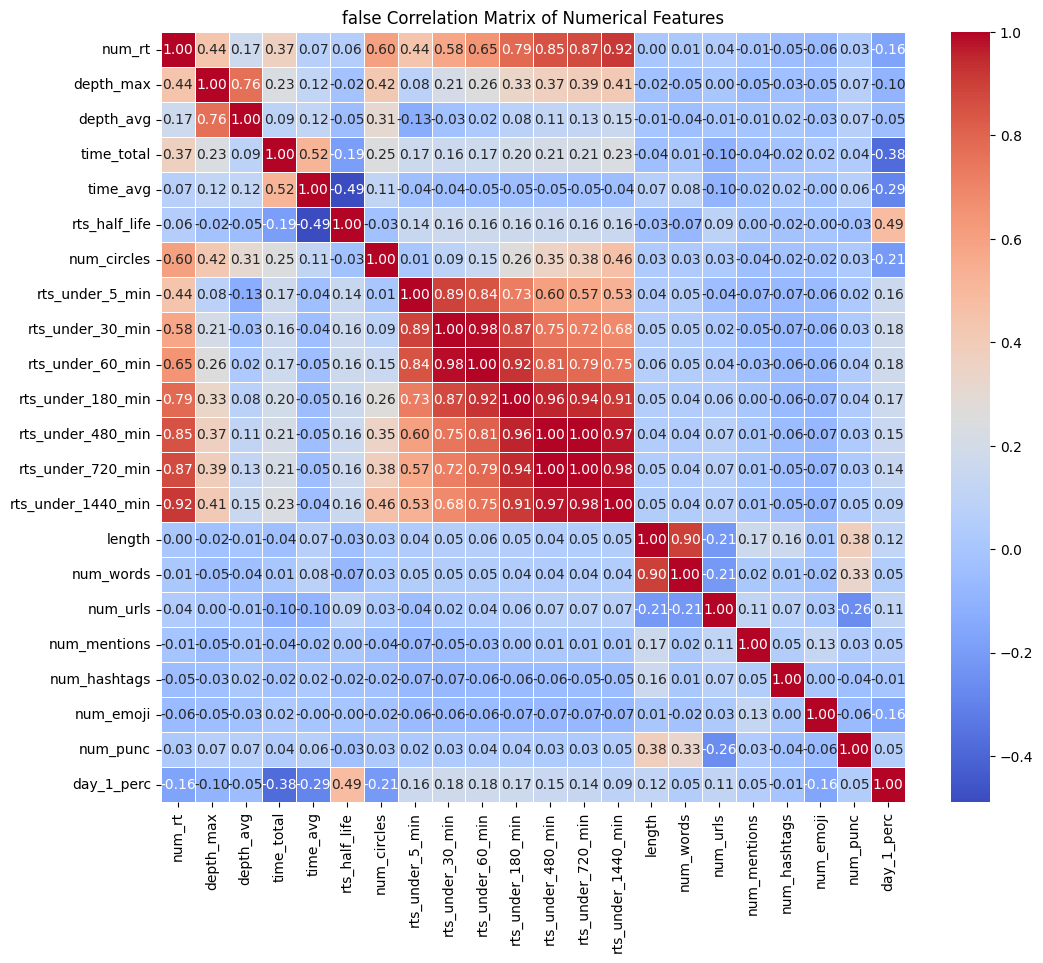

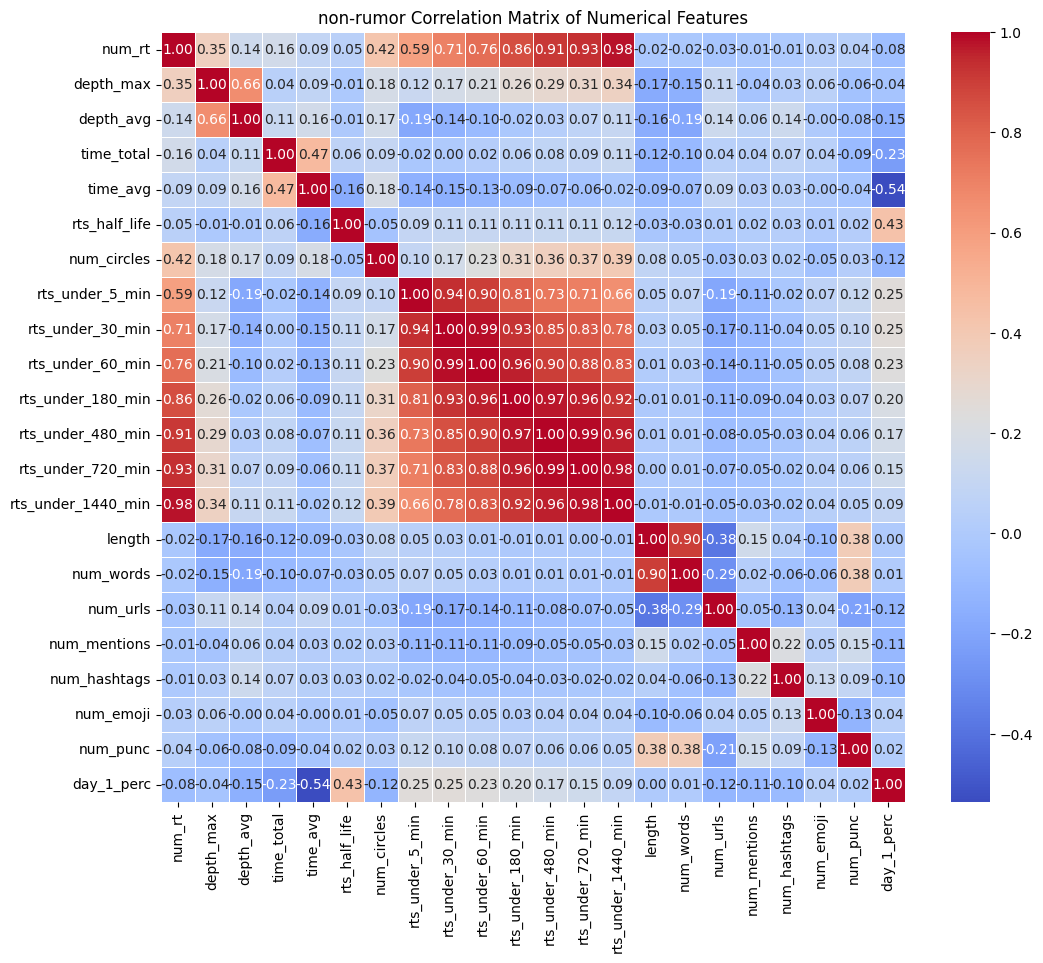

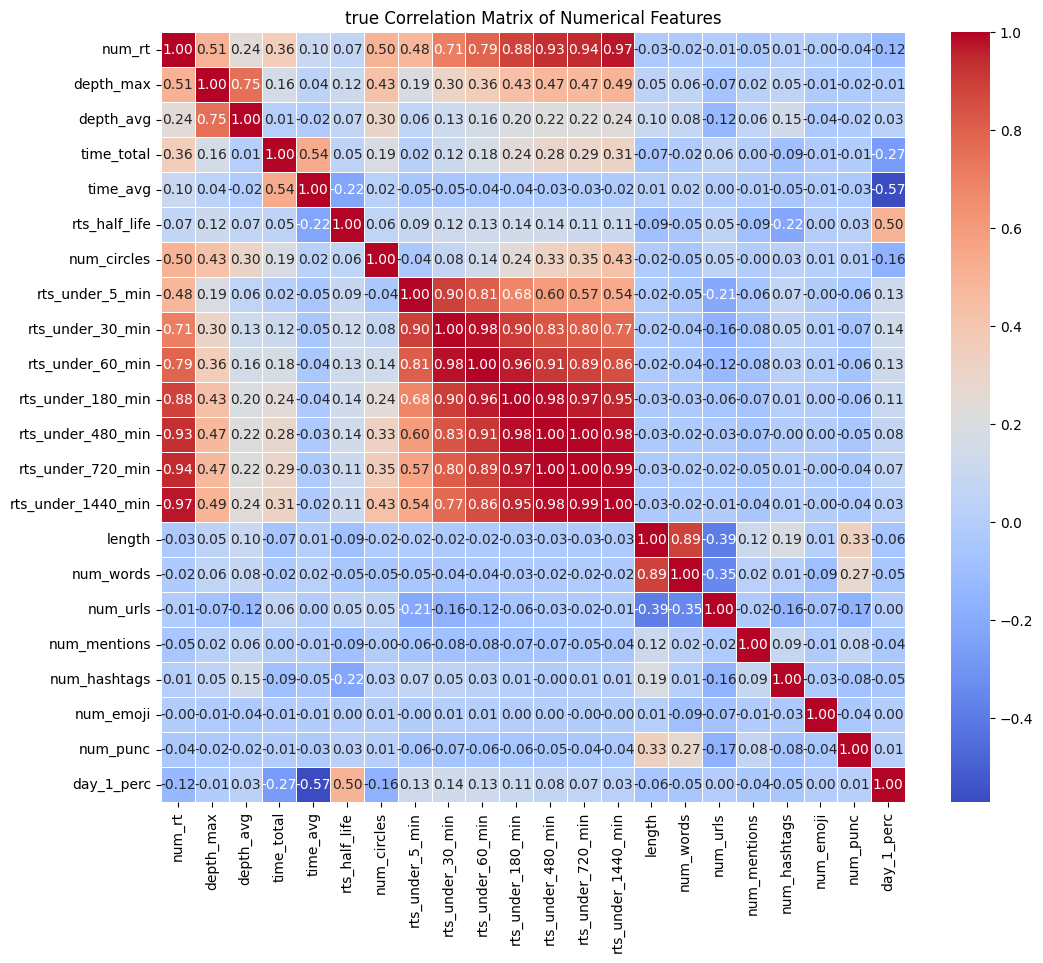

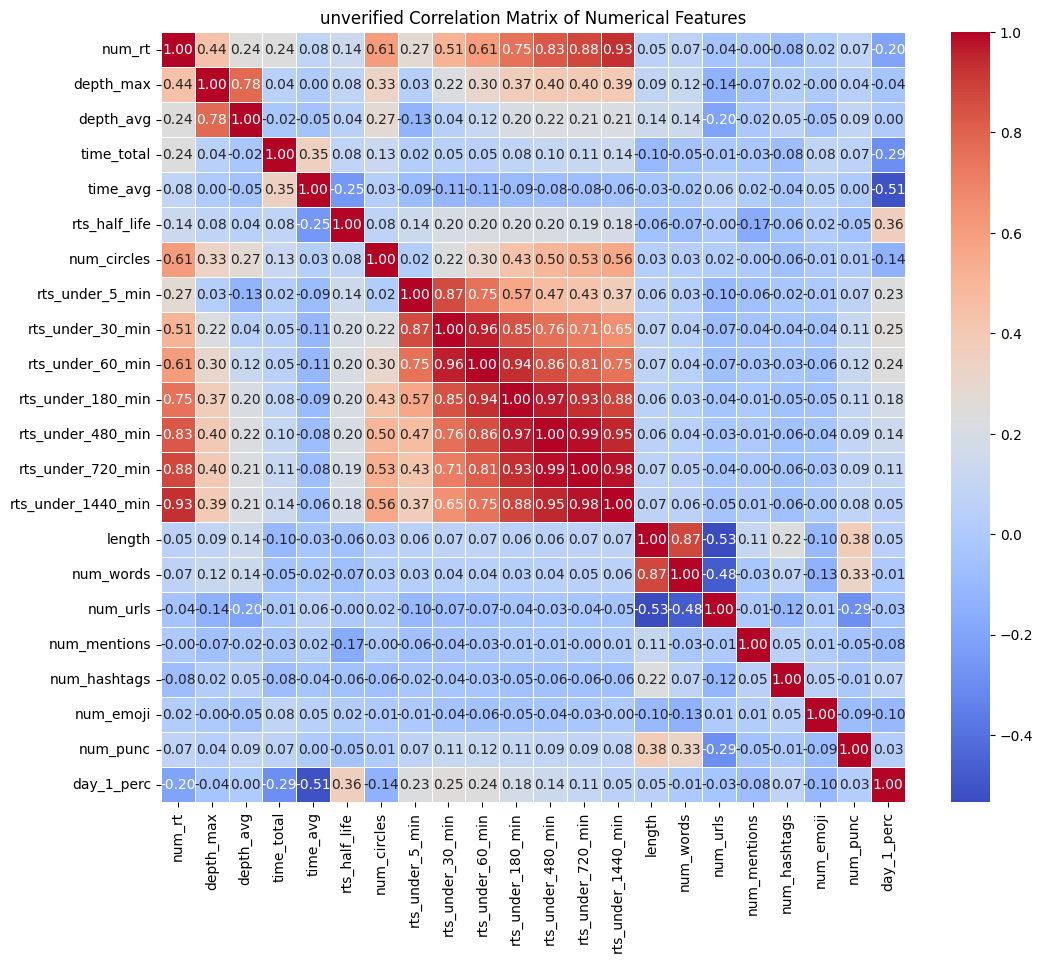

In [12]:
correlation_per_label(dfs, titles)

C:\Users\chronopoulos\AppData\Local\Temp\ipykernel_7564\3042762285.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


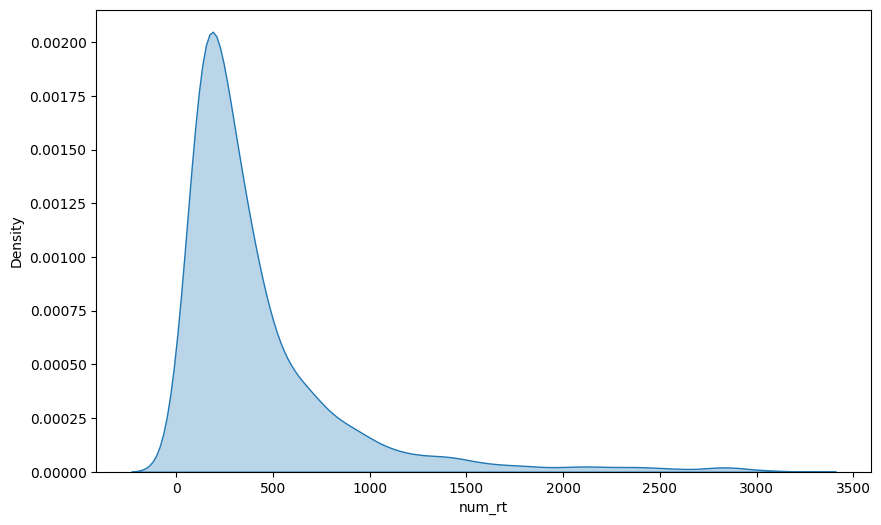

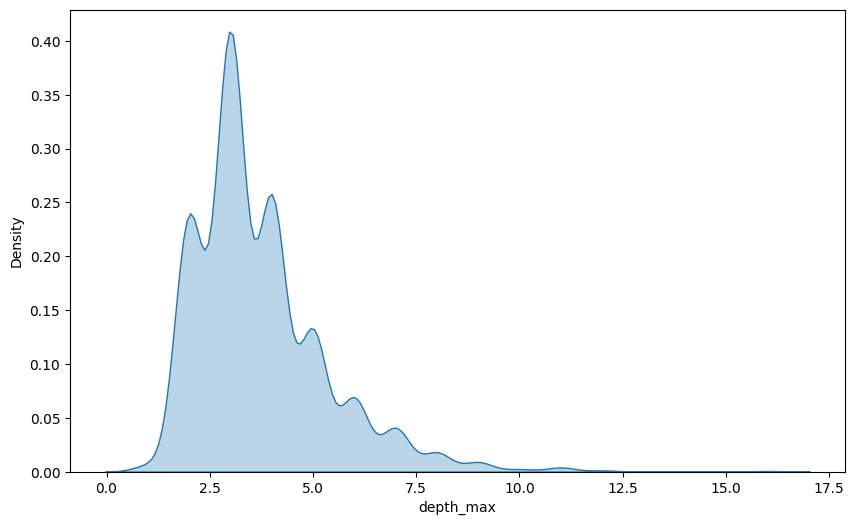

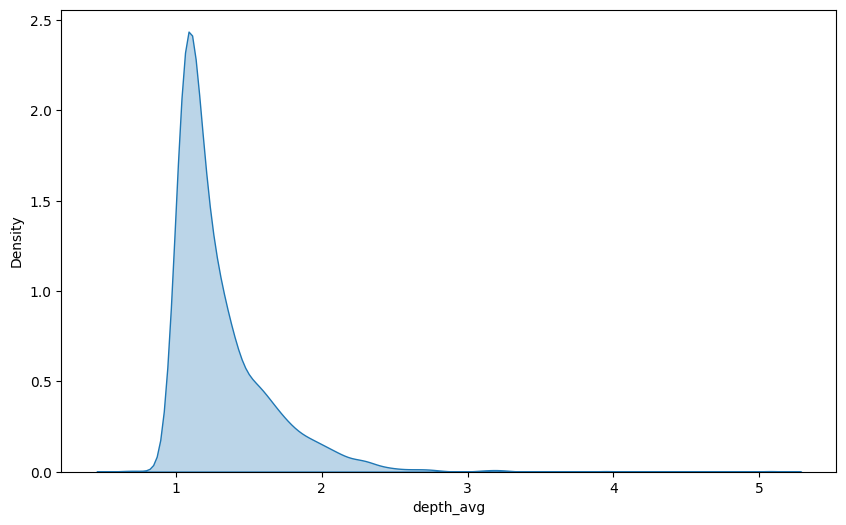

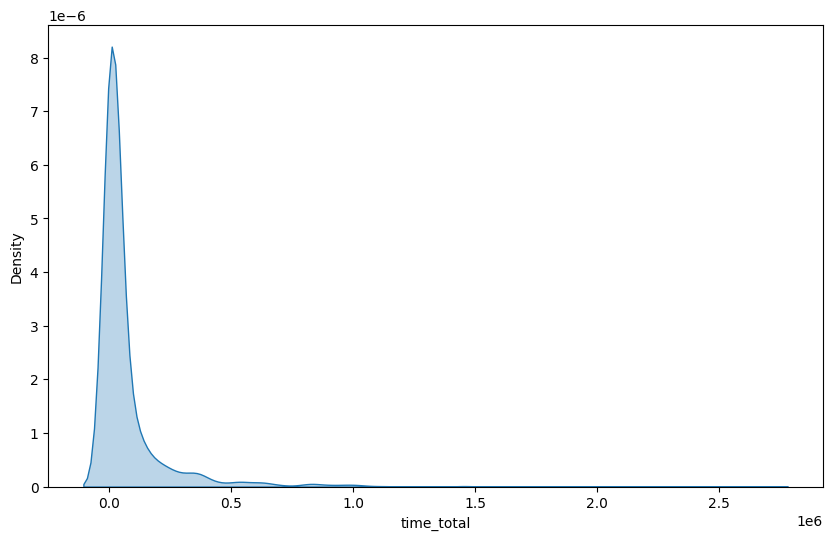

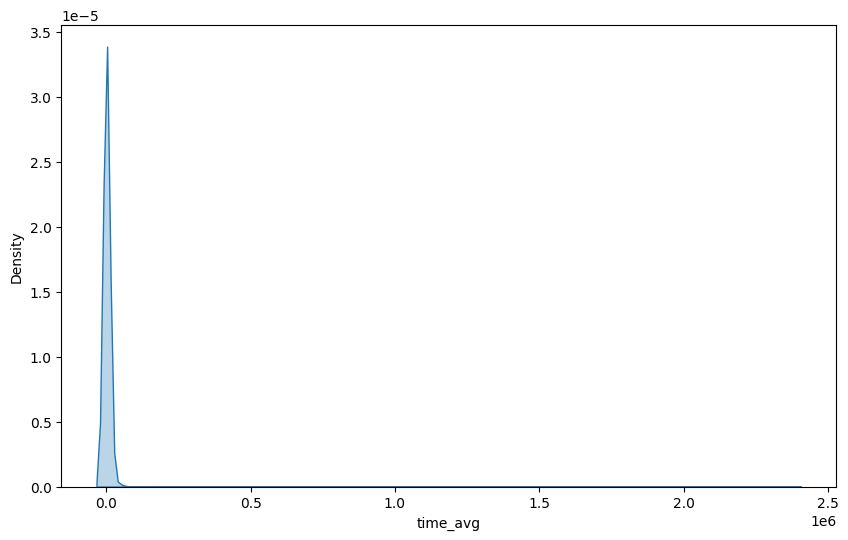

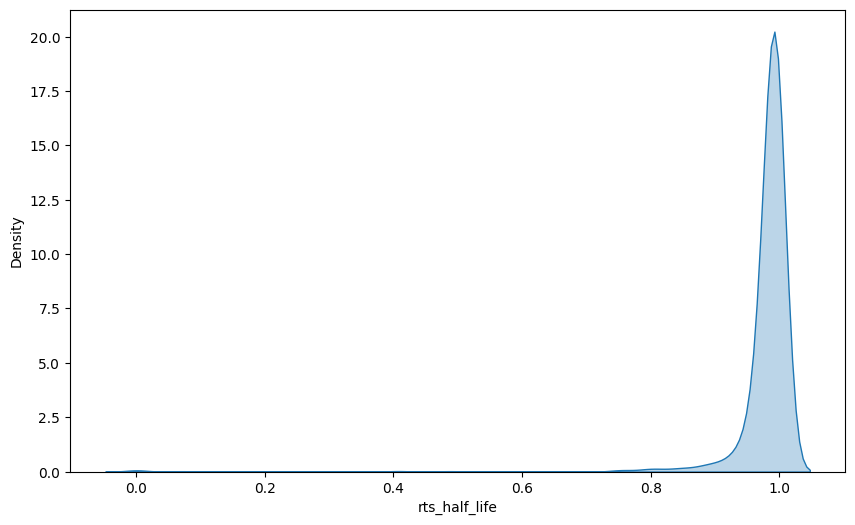

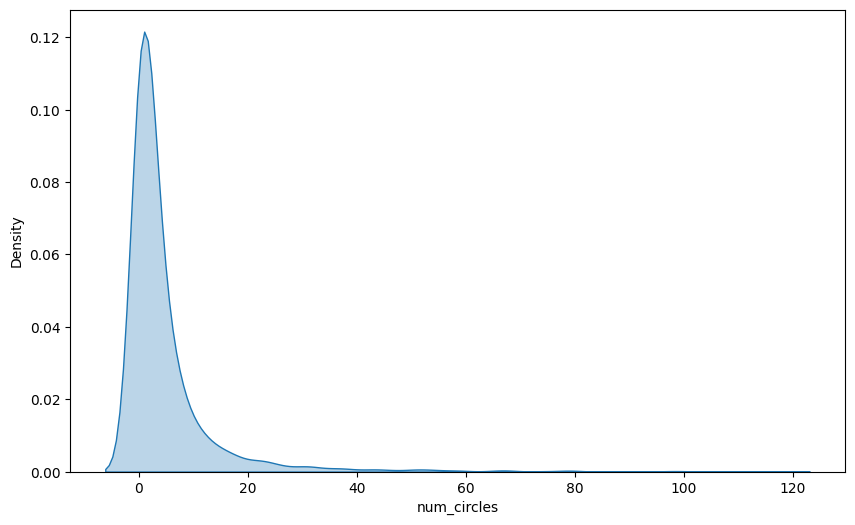

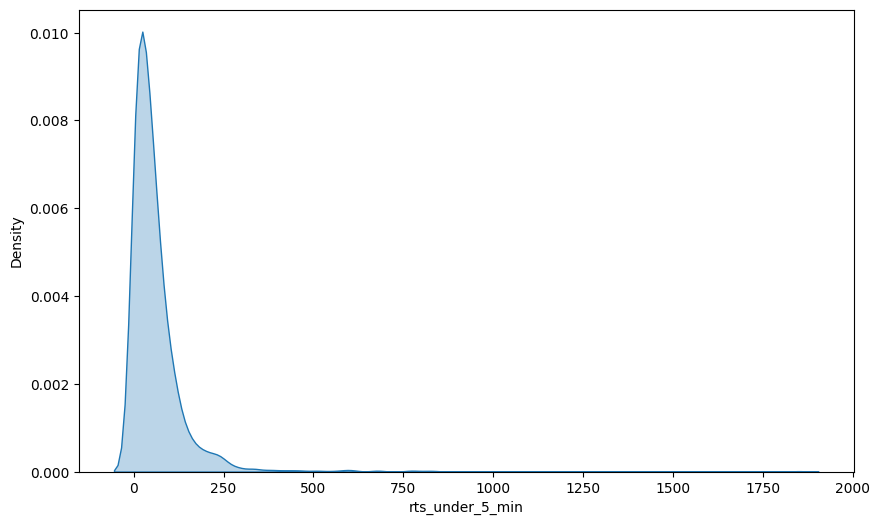

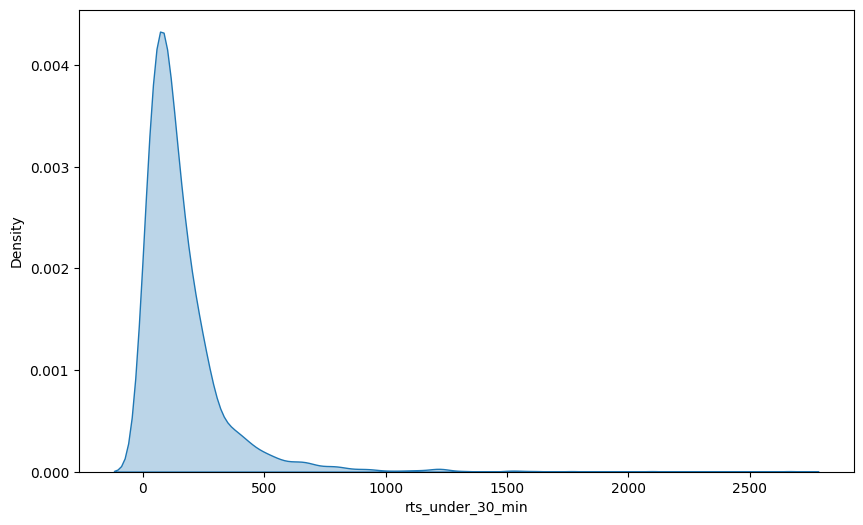

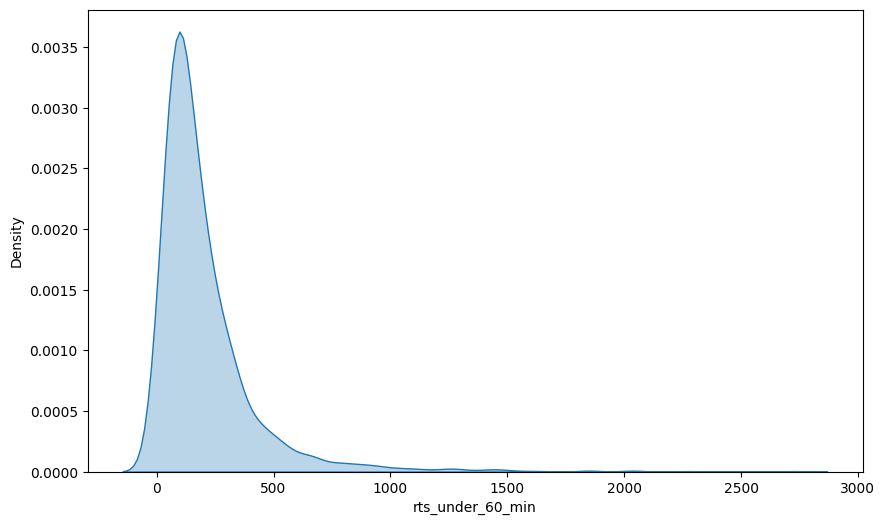

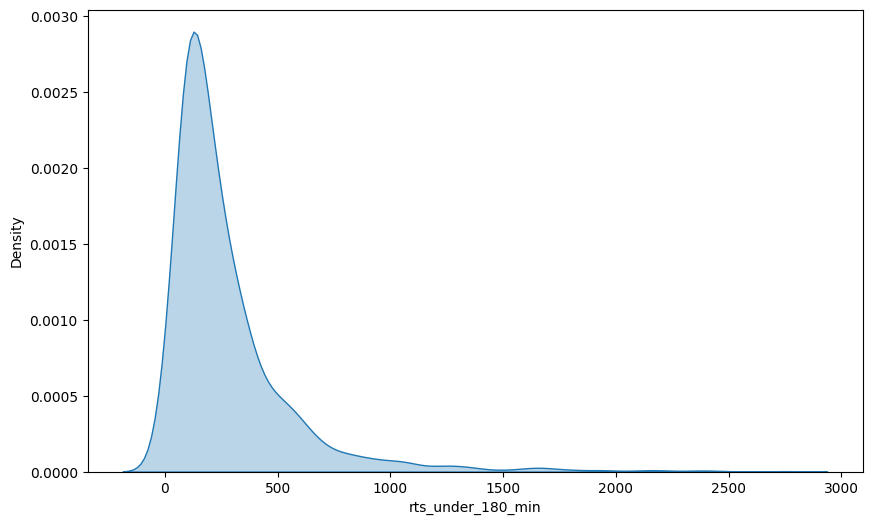

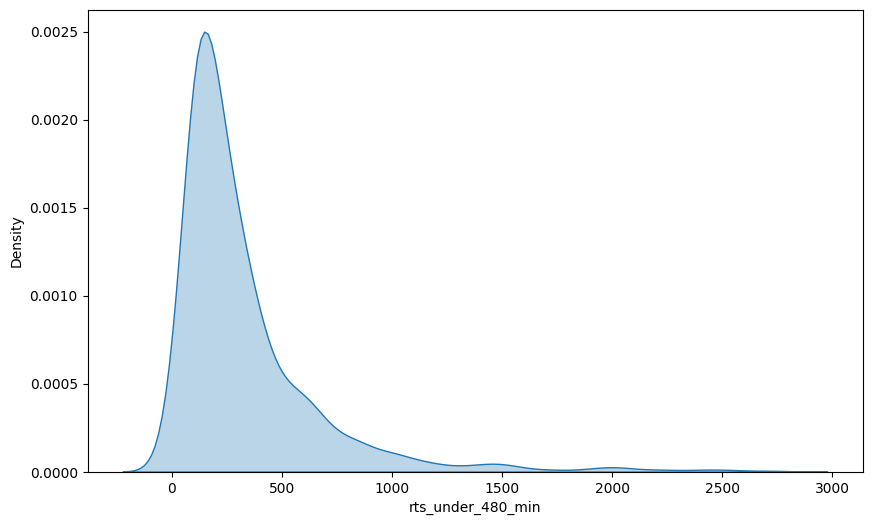

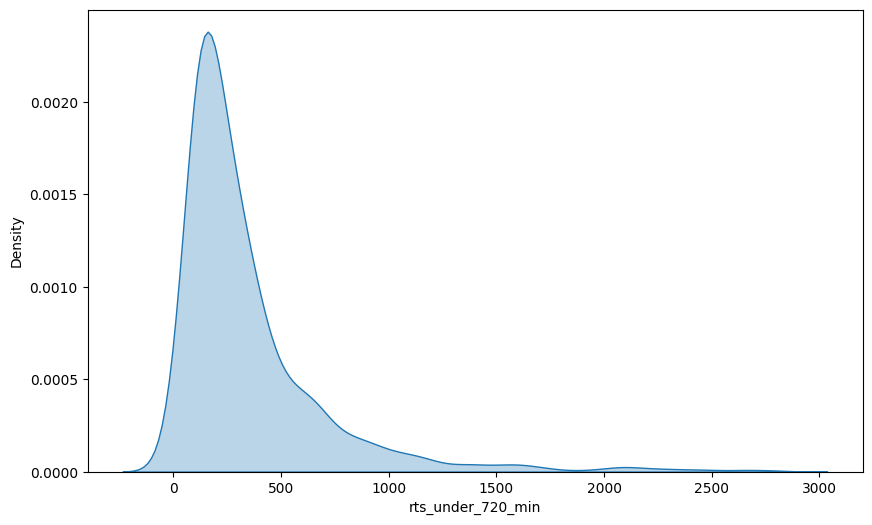

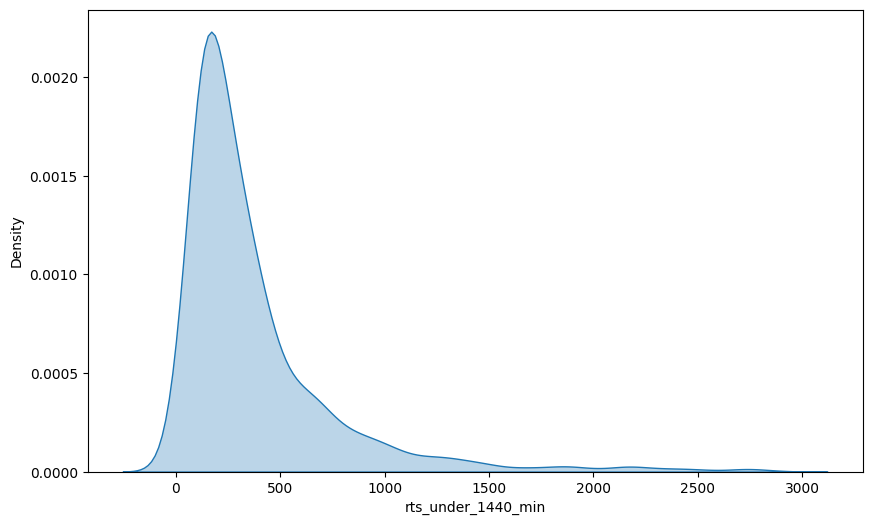

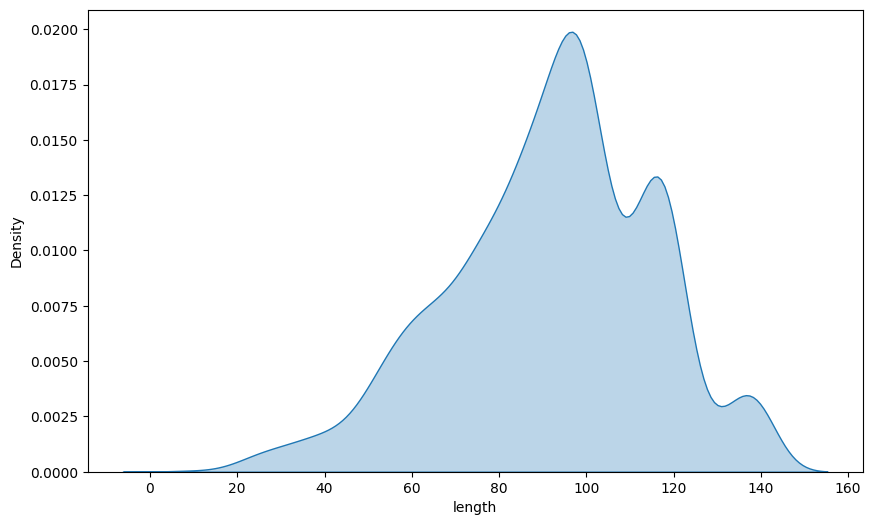

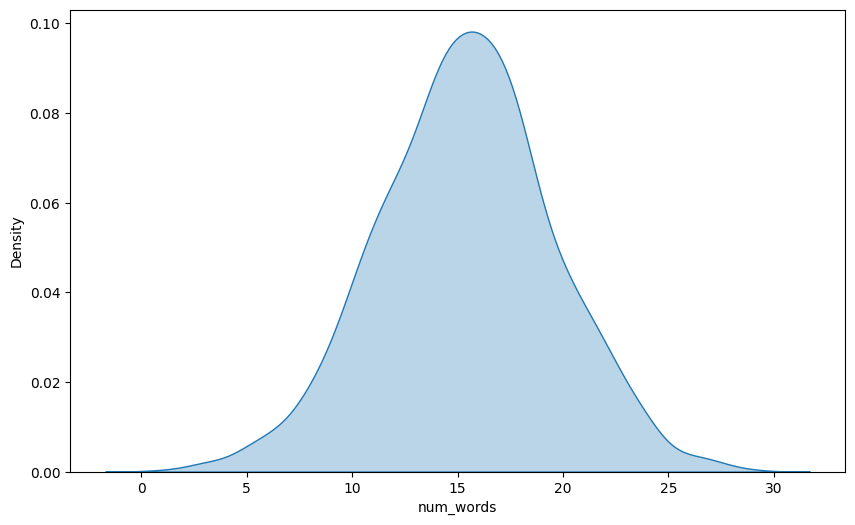

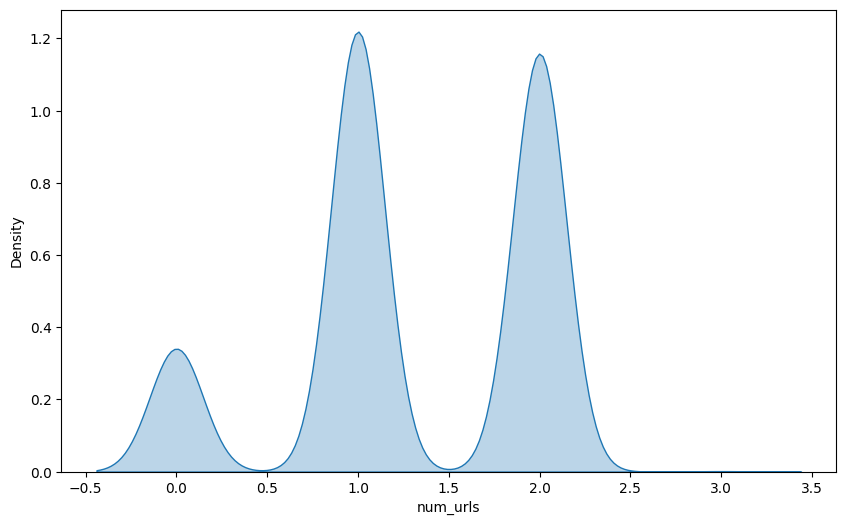

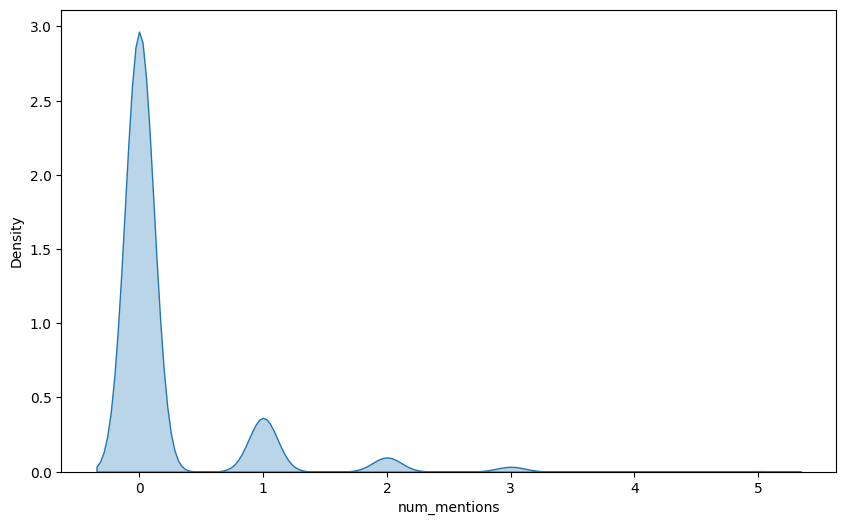

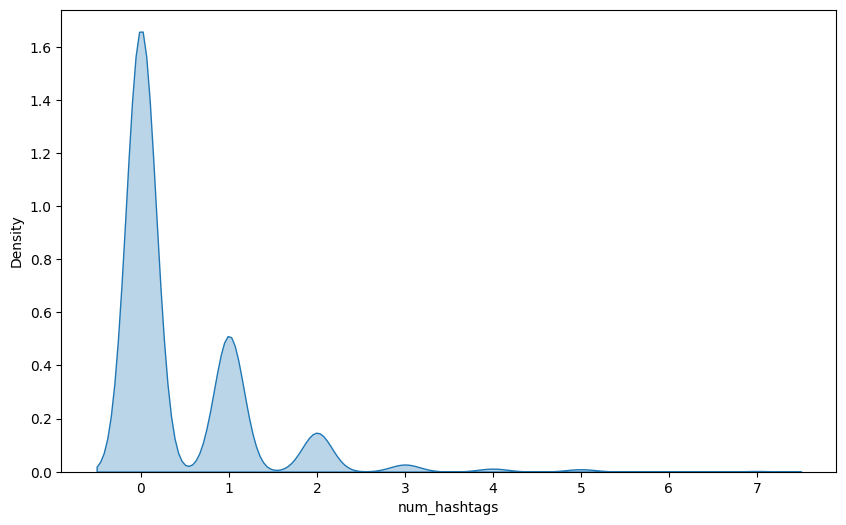

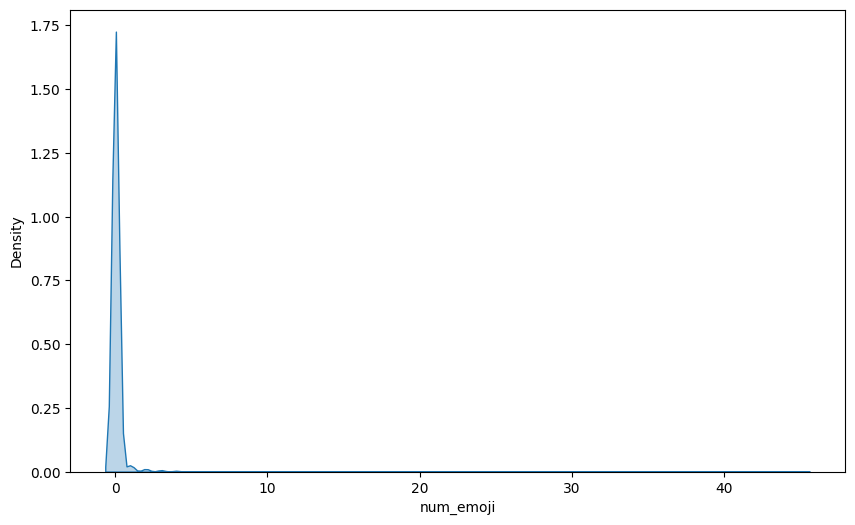

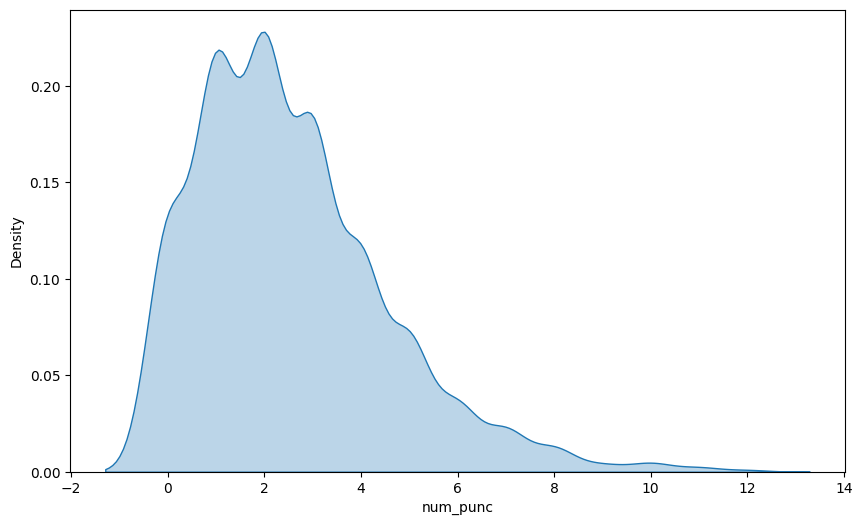

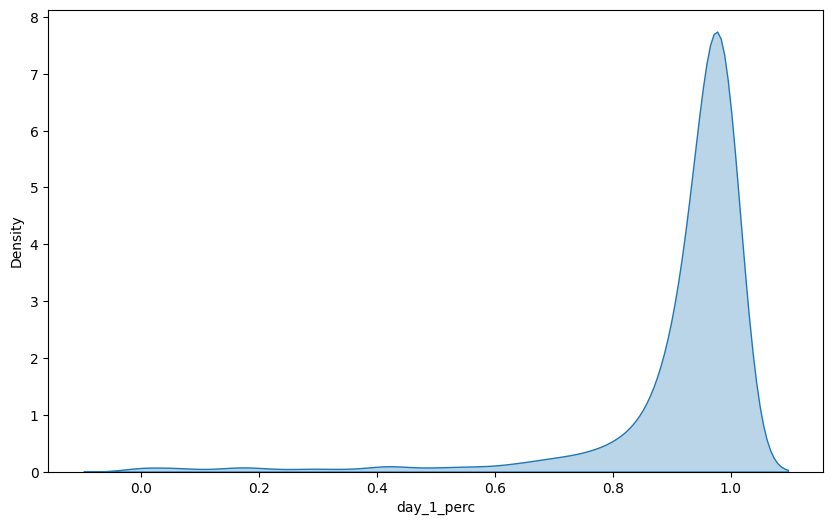

In [27]:
# distributions
def plot_dists(df):
    df_filtered = df.drop(columns=EXCLUDE_COLUMNS)
    
    for c in df_filtered.columns:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df_filtered[c], fill=True, alpha=0.3)

    return None

plot_dists(df)

In [13]:
# just true-false
df_true_false = df[(df['label'] == 0) | (df['label'] == 2)].copy()
df_true_false['label'] = df_true_false['label'].replace(2, 1)

df_true_false.to_csv(PATH + 'trueFalse.csv', index=False)

In [20]:
# TODO
# most common words

Index(['tweet_id', 'tweet', 'label', 'poster', 'num_rt', 'depth_max',
       'depth_avg', 'time_total', 'time_avg', 'rts_half_life', 'num_circles',
       'rts_under_5_min', 'rts_under_30_min', 'rts_under_60_min',
       'rts_under_180_min', 'rts_under_480_min', 'rts_under_720_min',
       'rts_under_1440_min', 'length', 'num_words', 'num_urls', 'num_mentions',
       'num_hashtags', 'num_emoji', 'num_punc', 'day_1_perc'],
      dtype='object')